Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) for us to use. This dataset was created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

> ### From Read.me on these data sets
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015.  It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants
>#### Format:
sentence \t score \n
>#### Details:
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:
* imdb.com
* amazon.com
* yelp.com

> For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

I chose the yelp.com data to classify.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/yelp_labelled.txt', delimiter='\t', encoding='latin-1',
                      header=None)
raw_data.columns = ['messages','review']

In [8]:
pd.set_option('display.max_colwidth', 0) # Making the column message legible
raw_data.tail()

,messages,review
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0
999,"Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.",0


In [4]:
df = raw_data.copy()

In [5]:
# Selecting negative keywords
keywords = ['avoid','awful','angry','avoid','avoided','bad','better','below','blah','bland',
            'below','cold','disgusted','disappointed','did not','don\'t','flop','hadn\'t','isn\'t',
            'lacked','no','not','nasty','overpriced','poor','problem','slow','shocked',
            'stupid','tasteless','rude','underwhelming','undercooked','unfortunately',
            'won\'t','worst','wasted','suck','sucked','sucks','wasn\'t','vomited','do not',
           'not good','would not','lacking','lack','not impressed','not worth','horrible',
           'disgust','slow','poisoning','overcooked','unwelcome','overpriced','terrible']

for key in keywords:
    df[str(key)] = df.messages.str.contains(
    '' + str(key) + '',
    case=False)

In [6]:
df['message'] = (df['review'] == 0)

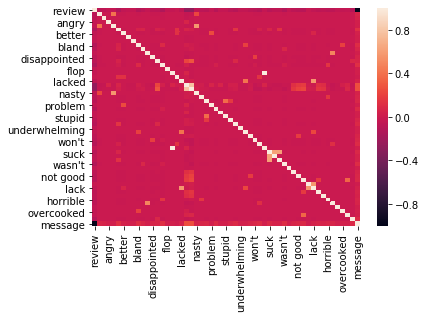

In [7]:
sns.heatmap(df.corr())

In [9]:
data = df[keywords + ['bad']]
target = df['review']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable
bnb = BernoulliNB()

# Fit our model to the data
y_pred = bnb.fit(data, target).predict(data)

# Display our results
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Accuracy : {}%".format(
    bnb.score(data, target) * 100
))
# 278 270 260

Number of mislabeled reviews out of a total 1000 reviews: 260
Accuracy : 74.0%


In [12]:
data.head()

,avoid,awful,angry,avoid,avoided,bad,better,below,blah,bland,...,not worth,horrible,disgust,slow,poisoning,overcooked,unwelcome,overpriced,terrible,bad
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred = gnb.fit(data, target).predict(data)
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Accuracy : {}%".format(
    gnb.score(data, target) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 345
Accuracy : 65.5%


In [14]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

y_pred = mnb.fit(data, target).predict(data)
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Accuracy : {}%".format(
    mnb.score(data, target) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 600
Accuracy : 40.0%


In [15]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

y_pred = cnb.fit(data, target).predict(data)
print('Number of mislabeled reviews out of a total {} reviews: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Accuracy : {}%".format(
    cnb.score(data, target) * 100
))

Number of mislabeled reviews out of a total 1000 reviews: 600
Accuracy : 40.0%
